### Introduction
This notebook enhances the previous analysis of coefficients of lift and drag in cylinder vortex shedding by now varying the sparsity of the SINDy method, thereby producing a range of sparse models.

We again load the data and time-delay embed our chosen signal; we then iteratively fit models to the data using SINDy with varying $\lambda$, the parameter that controls sparsity. At $\lambda = 0$, as in the previous notebook, all terms are online. As $\lambda$ increases, the number of terms in the system of ODEs decreases.



In [1]:
###  Import modules

import numpy as np
import matplotlib.pyplot as plt
import json

import warnings
warnings.filterwarnings("ignore")


###  Load the analysis settings and parameters

#  Load the configuration file with all settings
with open('config-lift.json', 'r') as f:
    config = json.load(f)

#  Read out and import all variables
for key, value in config.items():  print(f"{key}: {value}")
globals().update(config)



Re: 50
l_d_flag: lift
regime: trans
t_trm_1: 25000
t_trm_2: 50000
TDE_or_ddt: TDE
TD_Embed: 2
threshold: 0.25
poly_order: 3
diff_order: 2
should_normalize: 1
iterations: 26


In [2]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [3]:
###  Initiate and run SINDy, iteratively for varying sparisty

from runSINDy_Iter_Sparsity import fnc_runSINDy_Iter_Sparsity
save_dir , model , threshold_vec , Coefs_u1 , Coefs_u2 , NRMSE_1 , NRMSE_2 , NRMSE_sys = \
fnc_runSINDy_Iter_Sparsity()



Iterating from lambda = 0 to lambda = 0.25
Iteration  =  0  /  25  |  lambda  =  0.0
Iteration  =  2  /  25  |  lambda  =  0.02
Iteration  =  4  /  25  |  lambda  =  0.04
Iteration  =  6  /  25  |  lambda  =  0.06
Iteration  =  8  /  25  |  lambda  =  0.08
Iteration  =  10  /  25  |  lambda  =  0.1
Iteration  =  12  /  25  |  lambda  =  0.12
Iteration  =  14  /  25  |  lambda  =  0.14
Iteration  =  16  /  25  |  lambda  =  0.16
Iteration  =  18  /  25  |  lambda  =  0.18
Iteration  =  20  /  25  |  lambda  =  0.2
Iteration  =  22  /  25  |  lambda  =  0.22
Iteration  =  24  /  25  |  lambda  =  0.24


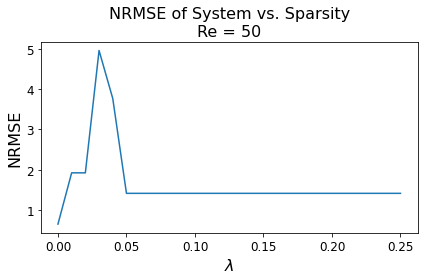

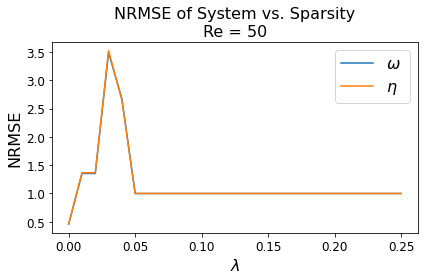

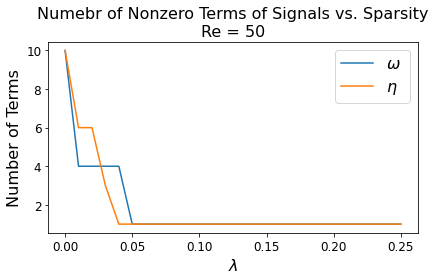

In [4]:
###  Plot NRMSE of the system vs. sparsity

plt.figure()
plt.plot( threshold_vec , NRMSE_sys  )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)
ttl_str = 'NRMSE of System vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'NRMSE_system.png')
plt.show()


###  Plot NRMSE of each signal vs. sparsity

plt.figure()
plt.plot( threshold_vec , NRMSE_1 , label=r'$\omega$' )
plt.plot( threshold_vec , NRMSE_2 , label=r'$\eta$  ' )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)
ttl_str = 'NRMSE of System vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'NRMSE_signals.png')
plt.show()


###  Plot number of nonzero terms of each signal vs. sparsity

plt.figure()
plt.plot( threshold_vec , np.count_nonzero(Coefs_u1 , axis=1) , label=r'$\omega$' )
plt.plot( threshold_vec , np.count_nonzero(Coefs_u2 , axis=1) , label=r'$\eta$  ' )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('Number of Terms' , fontsize=16)
ttl_str = 'Numebr of Nonzero Terms of Signals vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'Number_of_Terms.png')
plt.show()



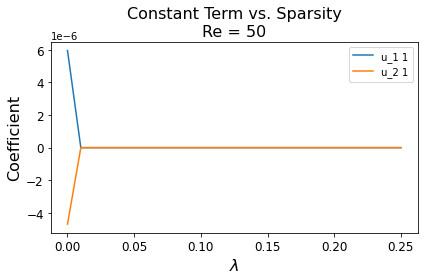

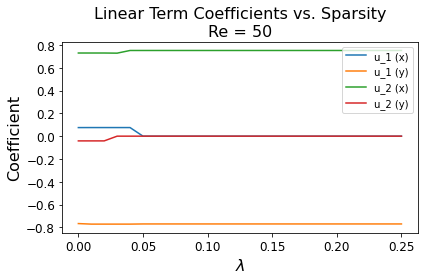

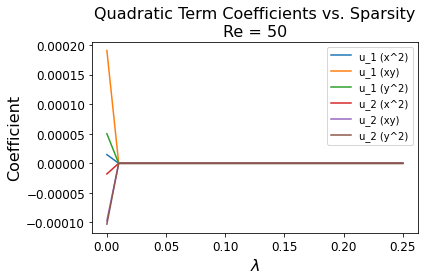

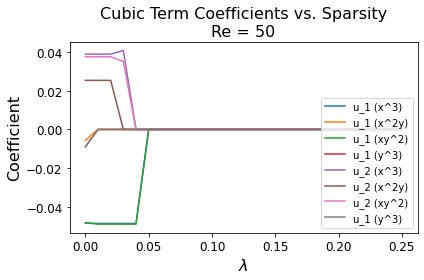

In [5]:
###  Plot the coefficients of the system vs. sparsity

# model.get_feature_names()


###  Plot constant term vs. sparsity

plt.figure()
plt.plot( threshold_vec , Coefs_u1[:,0] , label='u_1 1' )
plt.plot( threshold_vec , Coefs_u2[:,0] , label='u_2 1' )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('Coefficient' , fontsize=16)
ttl_str = 'Constant Term vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'Coefs_Ord_0.png')
plt.show()


###  Plot linear term coefficients vs. sparsity

plt.figure()

plt.plot( threshold_vec , Coefs_u1[:,1] , label='u_1 (x)' )
plt.plot( threshold_vec , Coefs_u1[:,2] , label='u_1 (y)' )

plt.plot( threshold_vec , Coefs_u2[:,1] , label='u_2 (x)' )
plt.plot( threshold_vec , Coefs_u2[:,2] , label='u_2 (y)' )

plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('Coefficient' , fontsize=16)
ttl_str = 'Linear Term Coefficients vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'Coefs_Ord_1.png')
plt.show()


###  Plot quadratic term coefficients vs. sparsity

plt.figure()

plt.plot( threshold_vec , Coefs_u1[:,3] , label='u_1 (x^2)' )
plt.plot( threshold_vec , Coefs_u1[:,4] , label='u_1 (xy)' )
plt.plot( threshold_vec , Coefs_u1[:,5] , label='u_1 (y^2)' )

plt.plot( threshold_vec , Coefs_u2[:,3] , label='u_2 (x^2)' )
plt.plot( threshold_vec , Coefs_u2[:,4] , label='u_2 (xy)' )
plt.plot( threshold_vec , Coefs_u2[:,5] , label='u_2 (y^2)' )

plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('Coefficient' , fontsize=16)
ttl_str = 'Quadratic Term Coefficients vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'Coefs_Ord_2.png')
plt.show()


###  Plot cubic term coefficients vs. sparsity

plt.figure()

plt.plot( threshold_vec , Coefs_u1[:,6] , label='u_1 (x^3)' )
plt.plot( threshold_vec , Coefs_u1[:,7] , label='u_1 (x^2y)' )
plt.plot( threshold_vec , Coefs_u1[:,8] , label='u_1 (xy^2)' )
plt.plot( threshold_vec , Coefs_u1[:,9] , label='u_1 (y^3)' )

plt.plot( threshold_vec , Coefs_u2[:,6] , label='u_2 (x^3)' )
plt.plot( threshold_vec , Coefs_u2[:,7] , label='u_2 (x^2y)' )
plt.plot( threshold_vec , Coefs_u2[:,8] , label='u_2 (xy^2)' )
plt.plot( threshold_vec , Coefs_u1[:,9] , label='u_1 (y^3)' )

plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('Coefficient' , fontsize=16)
ttl_str = 'Cubic Term Coefficients vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(save_dir+'Plots/'+'Coefs_Ord_3.png')
plt.show()

